In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('data.csv')
data

,client_email,freelancer_email,service,project_name,review,sentiment,rating
0,nishtha@gmail.com,kaushik@gmail.com,ppt,Project 0,The ppt developed by kaushik@gmail.com had sev...,Positive,5
1,test@gmail.com,anushka@gmail.com,figma,Project 1,I appreciate the effort put into the figma pro...,Neutral,3
2,anushka@gmail.com,nishtha@gmail.com,website,Project 2,I'm indifferent about the website project prov...,Negative,1
3,kaushik@gmail.com,nishtha@gmail.com,backend,Project 3,The backend work done by nishtha@gmail.com sur...,Neutral,3
4,nishtha@gmail.com,test@gmail.com,backend,Project 4,The backend provided by test@gmail.com was sat...,Neutral,3
...,...,...,...,...,...,...,...
995,nishtha@gmail.com,kaushik@gmail.com,figma,Project 995,The figma provided by kaushik@gmail.com was pr...,Neutral,3
996,raghav@gmail.com,kaushik@gmail.com,website,Project 996,The website provided by kaushik@gmail.com was ...,Neutral,3
997,anushka@gmail.com,raghav@gmail.com,frontend,Project 997,raghav@gmail.com provided an okay frontend pro...,Neutral,3
998,raghav@gmail.com,test@gmail.com,ppt,Project 998,The ppt work done by test@gmail.com was except...,Neutral,3


In [4]:
data.dtypes

client_email        object
freelancer_email    object
service             object
project_name        object
review              object
sentiment           object
rating               int64
dtype: object

<Axes: >

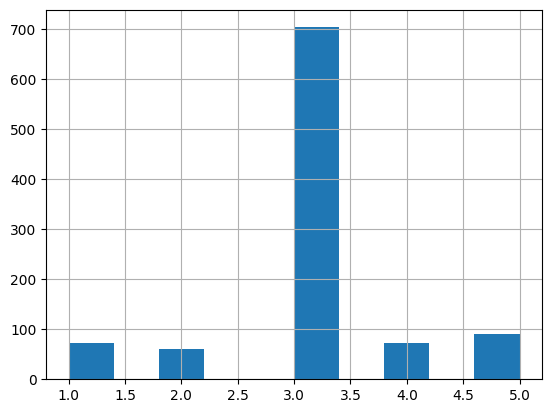

In [5]:
data['rating'].hist()

In [6]:
import nltk
# nltk.download('vader_lexicon')

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()

In [8]:
data.shuffled_index=np.random.permutation(data.index)
data=data.reindex(data.shuffled_index)
data
sample_review=data['review'][0:100]


C:\Users\Raghav\AppData\Local\Temp\ipykernel_26680\1394315337.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shuffled_index=np.random.permutation(data.index)


In [9]:
for sentences in sample_review:
    print(sentences)
    res=sentiment.polarity_scores(sentences)
    score=res['compound']
    if score>0.5:
        score=score*res['pos']
    elif score<-0.5:
        score=score*res['neg']
    else:
        score=score*res['neu']

    if score>0.25:
        print('Positive')
    elif score<-0.25:
        print('Negative')
    else:  
        print('Neutral')

    # print(res)

kaushik@gmail.com provided an okay figma project. It was neither good nor bad.
Negative
test@gmail.com failed to deliver a satisfactory backend project. It was a waste of time and money.
Neutral
I'm very satisfied with the ppt created by kaushik@gmail.com. Excellent work!
Positive
The figma work done by anushka@gmail.com surpassed my expectations. Highly impressed!
Neutral
I'm neutral about the backend project delivered by nishtha@gmail.com. It was neither exceptional nor disappointing.
Negative
The backend work done by test@gmail.com was subpar. I regret hiring them for this project.
Negative
I'm regretting hiring raghav@gmail.com for the backend project. The quality of work was poor.
Neutral
I have mixed feelings about the backend project provided by raghav@gmail.com. It was neither great nor terrible.
Neutral
The website work done by nishtha@gmail.com surpassed my expectations. Highly impressed!
Neutral
I'm indifferent about the ppt project provided by test@gmail.com. It neither imp

In [10]:
# nltk.download('all')

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random

In [12]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['review'])
y=data['rating']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)

0.89


In [17]:
#Input 
review=input('Enter the review: ')
from textblob import TextBlob 
blob = TextBlob(review)
print(sentiment.polarity_scores(review))
review=vectorizer.transform([review])
rating=model.predict(review)
print('The rating of the review is:',rating[0])


{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
The rating of the review is: 3


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv("data.csv")

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size=0.25, random_state=42)

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

classifier = LogisticRegression(max_iter=100)
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.848


In [15]:
print(y_pred)

[3 3 5 3 4 3 1 5 3 3 3 3 3 3 3 4 3 3 3 2 3 3 5 3 3 3 3 5 3 3 3 3 3 3 5 3 3
 3 3 2 3 3 3 2 3 3 1 3 3 3 3 1 3 3 1 5 3 3 3 3 4 3 3 3 3 1 3 3 4 3 1 3 3 3
 2 3 3 3 2 3 3 3 3 1 3 3 3 1 3 3 3 3 3 5 1 1 3 3 4 3 3 3 3 3 4 3 3 1 3 2 3
 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 3 5 3 3 1 3 3 3 4 3 4 1 3 3 3 5 5 3 3 2 3 5
 5 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 5 5 3 3 3 1 3 4 3 3 2 4 3 3 3
 5 3 3 3 2 2 3 4 1 3 3 3 3 5 3 5 3 3 3 4 3 3 3 3 3 3 5 5 2 5 3 3 1 1 3 3 3
 3 2 4 2 2 4 2 3 3 3 3 3 5 4 5 3 3 3 3 3 3 3 3 3 3 3 4 5]


In [16]:
# #Input

# review=input('Enter the review: ')
# review=vectorizer.transform([review])
# rating=classifier.predict(review)
# print('The rating of the review is:',rating[0])
